<a href="https://colab.research.google.com/github/sulthannauval/Machine-Learning-Course/blob/main/Tugas-UAS/UAS_Image_Classification_MINST_Handwritten_Digits_Sulthan_1103213065.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# UAS - CNN - Image Classification

---

*   Sulthan Nauval Abdillah
*   1103213065
*   [Dataset MINST Handwritten Digits](https://www.tensorflow.org/datasets/catalog/mnist)

## Import Library

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

## Load Dataset

In [17]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# x_train.shape, x_test.shape
# y_train.shape, y_test.shape

### Preview Data

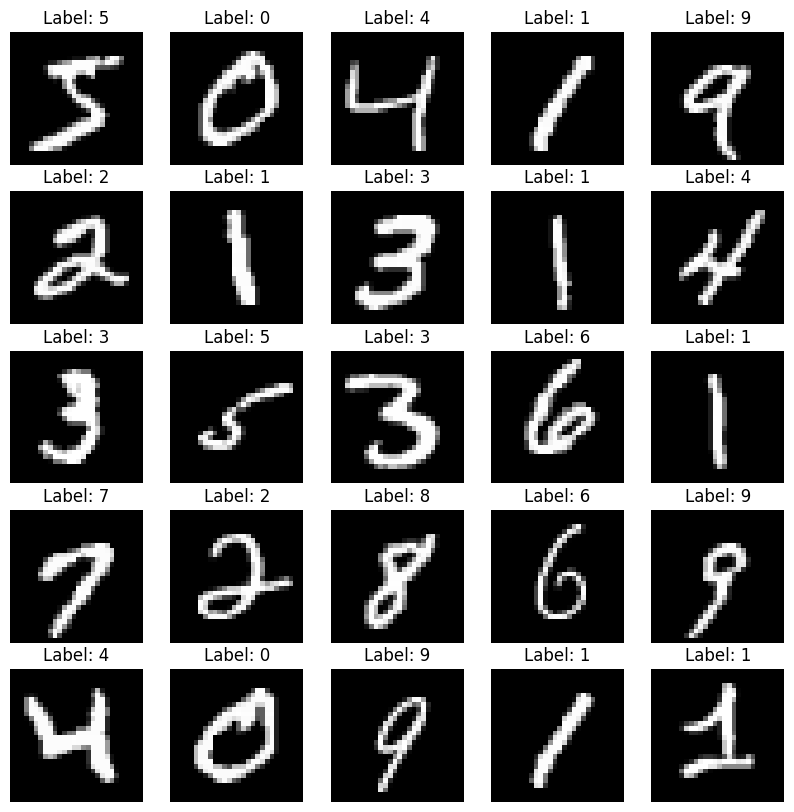

In [18]:
# Plot some examples
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

## Pre-Processing

### Normalize Data

In [19]:
# Normalize pixel values antara 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

### Reshape Data

In [20]:
# Reshape the data ke 4D (batch_size, height, width, channels)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### One-Hot Encoding

In [21]:
# Convert labels ke categorical one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

## Create model

In [22]:
model = Sequential([
    Input(shape=(28, 28, 1)), # 28 x 28 x 1
    Conv2D(32, (3, 3), activation='relu'), # 26 x 26 x 32
    MaxPooling2D((2, 2)), # 13 x 13 x 32
    Conv2D(64, (3, 3), activation='relu'), # 11 x 11 x 64
    MaxPooling2D((2, 2)), # 5 x 5 x 64
    Flatten(), # 1600 x 1
    Dense(128, activation='relu'),
    Dropout(0.5),  # Adding dropout untuk regularization agar tidak overfitting
    Dense(10, activation='softmax') # 10 neuron (sesuai dengan jumlah kelas pada MNIST)
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

## Train Model

In [23]:
# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=20, batch_size=128,
                    validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/20
469/469 [==============================] - 4s 6ms/step - loss: 0.3172 - accuracy: 0.9037 - val_loss: 0.0657 - val_accuracy: 0.9782
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1050 - accuracy: 0.9694 - val_loss: 0.0431 - val_accuracy: 0.9855
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0774 - accuracy: 0.9765 - val_loss: 0.0369 - val_accuracy: 0.9875
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0633 - accuracy: 0.9814 - val_loss: 0.0351 - val_accuracy: 0.9887
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0527 - accuracy: 0.9844 - val_loss: 0.0312 - val_accuracy: 0.9889
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0454 - accuracy: 0.9859 - val_loss: 0.0277 - val_accuracy: 0.9902
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0417 - accuracy: 0.9876 - val_loss: 0.0259 - val_accuracy: 0.9905
Epoch 

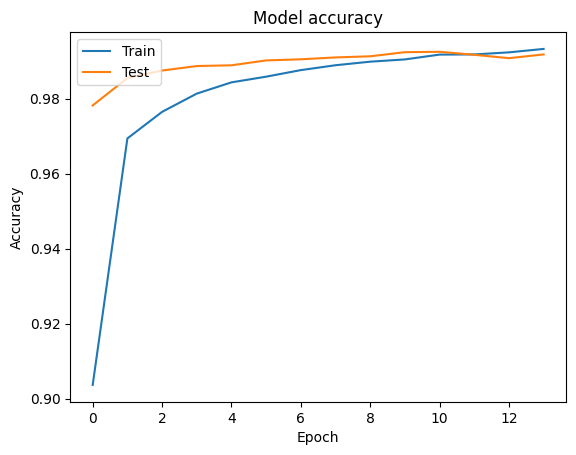

In [24]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Test Model

In [25]:
# Predict images from the test set
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


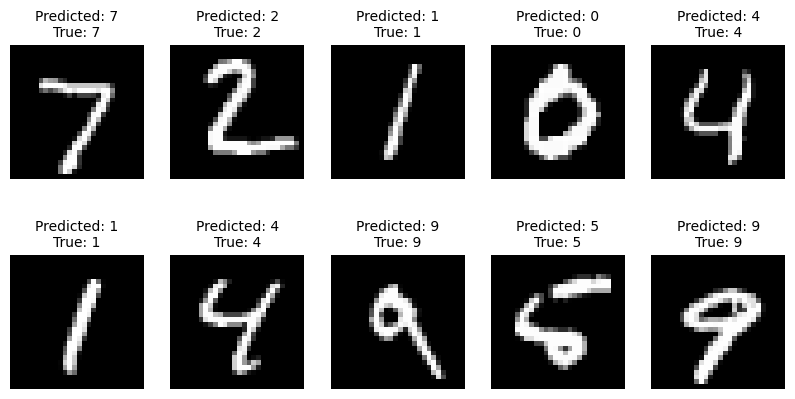

In [26]:
# Convert predictions dan true labels ke integers
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Plot the 10 test images pertama dengan hasil predicted dan true labels-nya
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {y_pred_labels[i]}\nTrue: {y_true_labels[i]}', fontsize=10)
    plt.axis('off')
plt.show()

## Evaluate Model

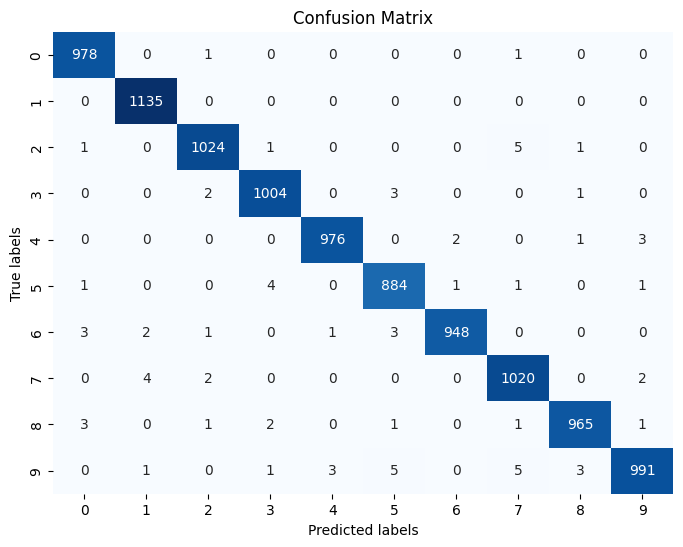

In [27]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Plot confusion matrix dengan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [28]:
# Generate classification report
class_report = classification_report(y_true_labels, y_pred_labels)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

